In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv('city_united.csv')
df

,UA_Name,UA_Country,UA_Continent,Housing,Cost of Living,Startups,Venture Capital,Travel Connectivity,Commute,Business Freedom,...,Healthcare,Education,Environmental Quality,Economy,Taxation,Internet Access,Leisure & Culture,Tolerance,Outdoors,Quality of Life Index
0,Adelaide,Australia,Oceania,6.3095,4.692,3.1365,2.640,1.7765,5.33625,9.399667,...,7.936667,5.1420,8.33075,6.0695,4.5885,4.3410,4.3285,7.8220,5.5310,200.03
1,Raleigh,North Carolina,North America,6.1285,5.610,5.4970,5.157,1.7570,4.78425,8.671000,...,6.677333,7.1165,8.58375,6.5145,4.0620,7.9515,6.6130,7.5620,3.3905,197.30
2,Zurich,Switzerland,Europe,1.4730,1.000,6.2035,3.872,7.7335,5.83950,8.888000,...,7.670333,7.2875,8.64300,6.5520,6.4285,7.2675,4.9655,8.7845,5.4010,194.41
3,Wellington,New Zealand,Oceania,5.1345,5.161,2.4715,1.753,0.8525,6.03975,10.000000,...,8.078333,4.7560,9.60925,5.5055,5.9315,5.1745,4.5990,8.1160,6.3970,193.89
4,Charlotte,North Carolina,North America,5.5490,4.987,6.2480,2.878,3.6790,4.13400,8.671000,...,6.432333,3.6245,8.00925,6.5145,4.0620,6.3870,5.6060,6.7895,1.3115,193.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,Delhi,India,Asia,9.7520,9.869,9.8285,9.099,5.6420,3.71225,3.618000,...,3.712667,0.5120,2.20300,5.5565,3.4145,3.5880,5.6830,3.1160,1.1785,69.56
183,Jakarta,Indonesia,Asia,8.6710,8.471,5.6495,6.437,2.4885,3.64000,4.028667,...,4.184000,1.0275,2.48575,4.6575,6.2660,4.4990,8.1460,2.0665,7.2020,68.46
184,Lagos,Nigeria,Africa,7.7670,9.098,6.4335,2.510,1.7480,3.56475,3.255667,...,2.862333,0.0000,1.90725,5.0610,6.2155,1.6340,1.3585,1.4060,3.8245,50.72
185,Manila,Philippines,Asia,8.5955,8.752,4.8050,3.547,2.6345,3.71300,4.592333,...,4.297667,0.0000,1.68300,5.0065,4.3030,4.6080,7.5840,5.5030,4.8255,41.88


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   UA_Name                187 non-null    object 
 1   UA_Country             187 non-null    object 
 2   UA_Continent           187 non-null    object 
 3   Housing                187 non-null    float64
 4   Cost of Living         187 non-null    float64
 5   Startups               187 non-null    float64
 6   Venture Capital        187 non-null    float64
 7   Travel Connectivity    187 non-null    float64
 8   Commute                187 non-null    float64
 9   Business Freedom       187 non-null    float64
 10  Safety                 187 non-null    float64
 11  Healthcare             187 non-null    float64
 12  Education              187 non-null    float64
 13  Environmental Quality  187 non-null    float64
 14  Economy                187 non-null    float64
 15  Taxati

In [4]:
numerical = ['Housing', 'Cost of Living','Startups', 'Venture Capital', 'Travel Connectivity', 'Commute','Business Freedom', 'Safety', 'Healthcare', 'Education','Environmental Quality', 'Economy', 'Taxation', 'Internet Access','Leisure & Culture', 'Tolerance', 'Outdoors', 'Quality of Life Index']
catigorial = ['UA_Name', 'UA_Country', 'UA_Continent']

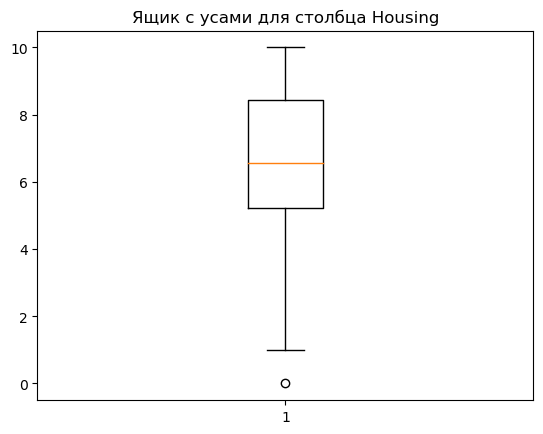

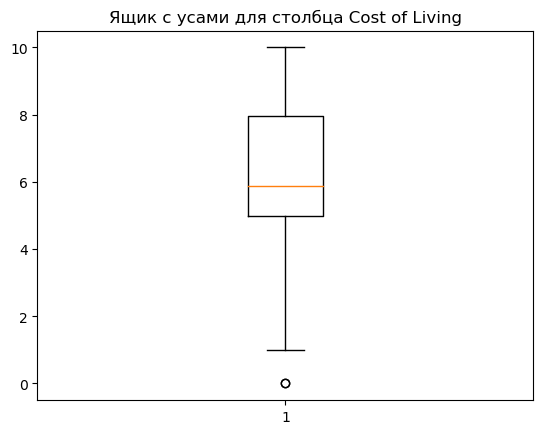

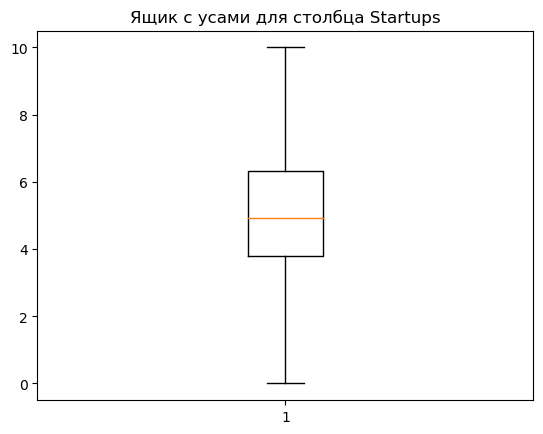

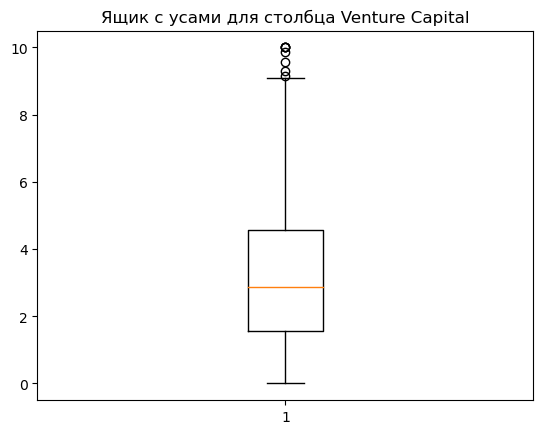

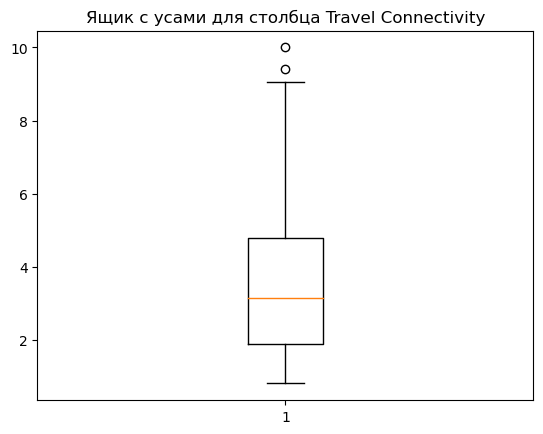

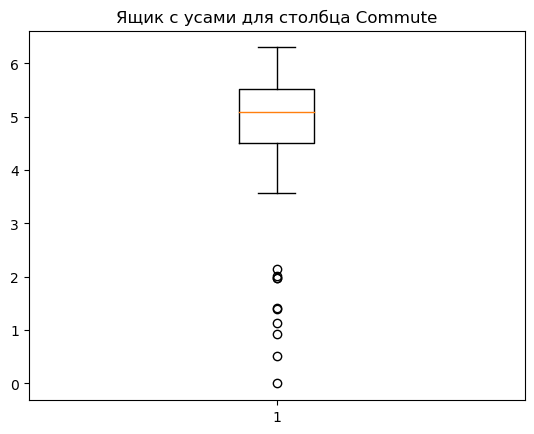

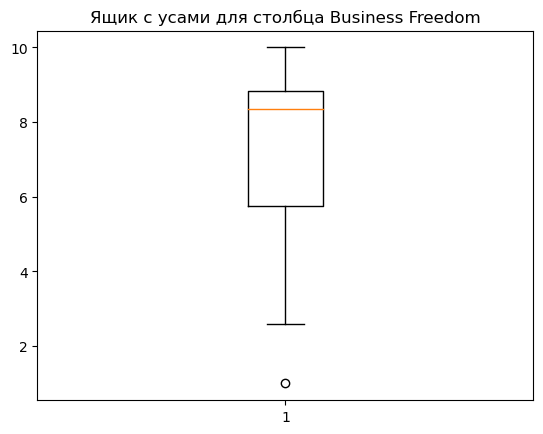

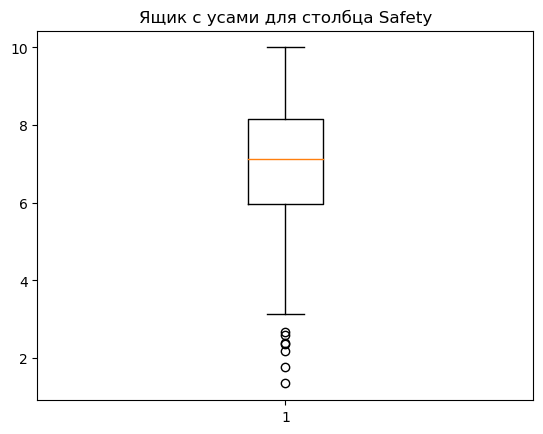

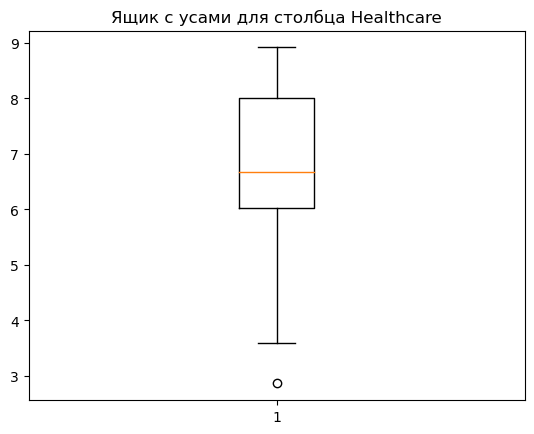

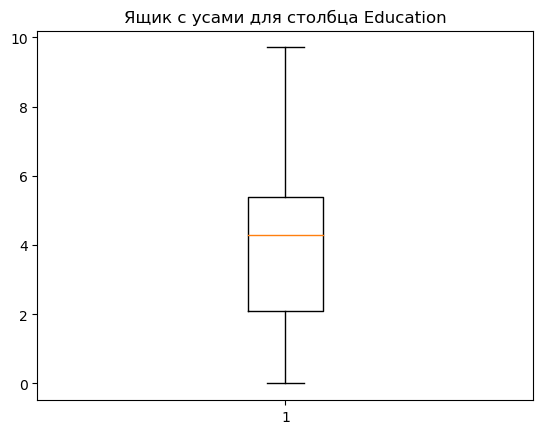

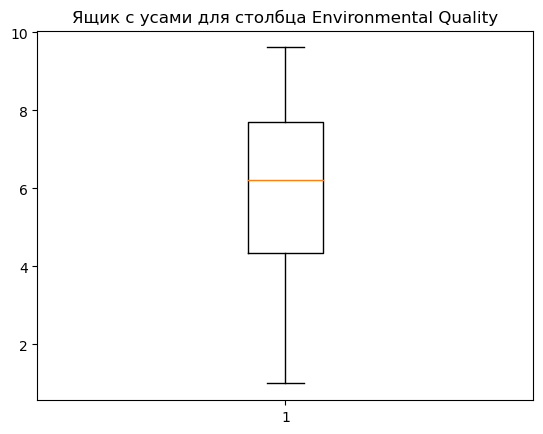

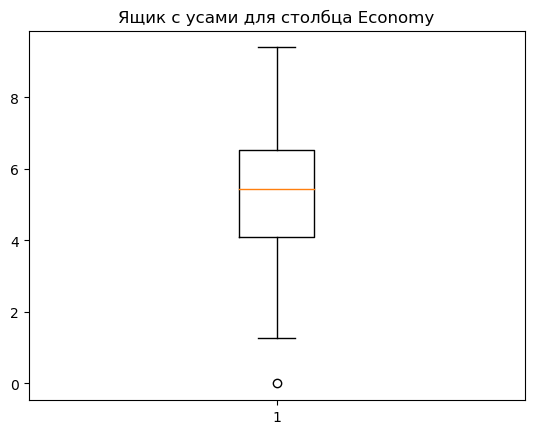

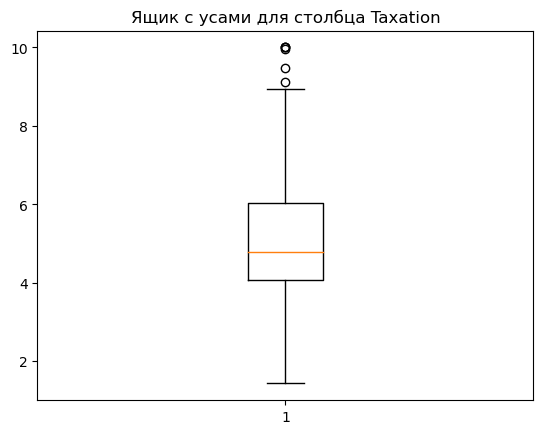

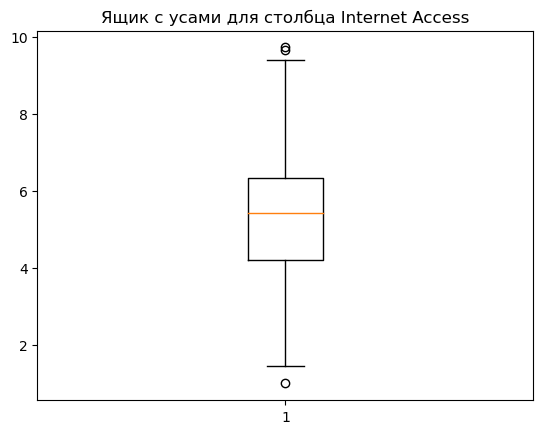

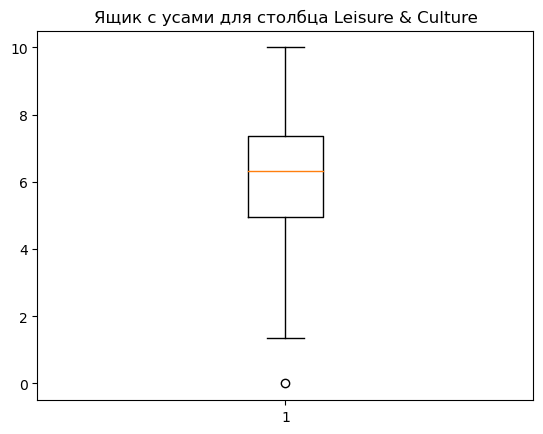

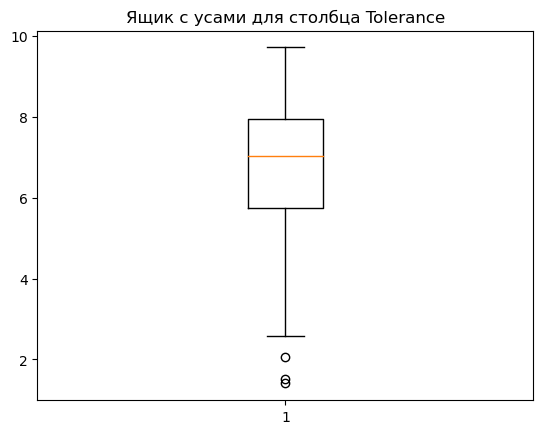

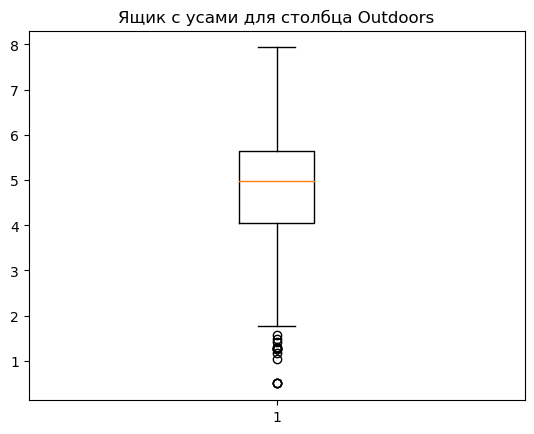

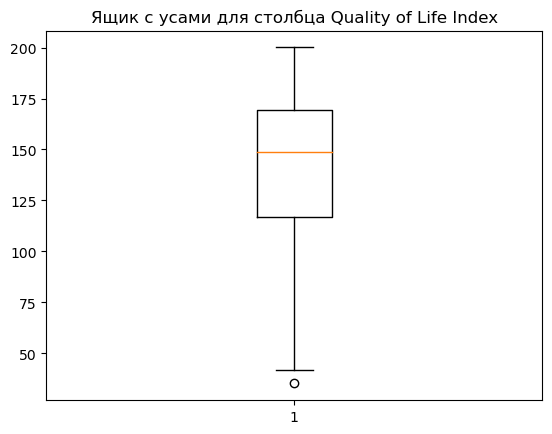

In [5]:
for i in df[numerical].columns:
    plt.boxplot(df[i]) #строим боксплоты
    plt.title(f'Ящик с усами для столбца {i}')
    plt.show()

In [6]:
def iqrr(df, columns):
    mu = df[columns].mean()
    sigma = df[columns].std()
    ej_h = mu + 3 * sigma
    ej_l = mu - 3 * sigma
    good_df = df[~((df[columns] < ej_l) | (df[columns] > ej_h)).any(axis=1)]
    return good_df


columnss = numerical
df = iqrr(df, columnss)

In [7]:
X = df.drop(["Quality of Life Index"], axis=1)
y = df[["Quality of Life Index"]]

In [8]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.33, random_state=42)
train_X.shape

(117, 20)

In [9]:
train_X.columns

Index(['UA_Name', 'UA_Country', 'UA_Continent', 'Housing', 'Cost of Living',
       'Startups', 'Venture Capital', 'Travel Connectivity', 'Commute',
       'Business Freedom', 'Safety', 'Healthcare', 'Education',
       'Environmental Quality', 'Economy', 'Taxation', 'Internet Access',
       'Leisure & Culture', 'Tolerance', 'Outdoors'],
      dtype='object')

In [10]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(train_X[catigorial])

features_name = enc.get_feature_names_out(catigorial)
train_X[features_name] =  enc.transform(train_X[catigorial]).toarray()
train_X = train_X.drop(catigorial, axis=1)

test_X[features_name] = enc.transform(test_X[catigorial]).toarray()
test_X = test_X.drop(catigorial, axis=1)

C:\Users\HP\AppData\Local\Temp\ipykernel_13736\402274117.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_X[features_name] =  enc.transform(train_X[catigorial]).toarray()
C:\Users\HP\AppData\Local\Temp\ipykernel_13736\402274117.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_X[features_name] =  enc.transform(train_X[catigorial]).toarray()
C:\Users\HP\AppData\Local\Temp\ipykernel_13736\402274117.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many 

In [11]:
train_X.shape

(117, 219)

In [12]:
train_X

,Housing,Cost of Living,Startups,Venture Capital,Travel Connectivity,Commute,Business Freedom,Safety,Healthcare,Education,...,UA_Country_ Vietnam,UA_Country_ Virginia,UA_Country_ Washington,UA_Country_ Wisconsin,UA_Continent_Africa,UA_Continent_Asia,UA_Continent_Europe,UA_Continent_North America,UA_Continent_Oceania,UA_Continent_South America
22,2.7715,1.000,3.1680,2.875,1.1350,5.47500,9.360000,8.6580,8.079000,4.0570,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
152,9.1375,8.787,6.9535,2.111,5.8355,4.06575,5.948333,6.8935,6.840000,2.1525,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
101,6.5330,6.208,6.5085,4.558,3.3025,4.82850,8.671000,2.5830,6.126333,4.5910,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
72,4.9755,5.241,8.8350,7.257,5.2915,3.89775,8.671000,2.6725,6.023333,6.4570,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
174,10.0000,10.000,5.0985,2.958,3.7575,3.99025,5.790667,6.7910,4.041000,0.5000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,6.8110,5.363,3.3605,4.423,6.5950,5.10575,8.992000,7.7310,8.633667,4.9825,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
110,7.9770,5.644,5.4685,2.781,2.5105,5.60650,8.341667,9.5420,5.905333,5.5895,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
14,6.2520,5.125,3.5405,3.017,4.8075,6.03175,8.836667,9.1070,8.559333,5.0805,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
96,6.7635,7.955,5.6110,3.725,2.1630,3.84250,4.732000,5.3280,4.343000,0.8945,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [13]:
X_train_clear, X_test_clear = train_X, test_X

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_X = scaler.fit_transform(train_X)
test_X = scaler.transform(test_X)

In [15]:
model = LinearRegression()
model.fit(X_train_clear, train_y)
print(f"R2 на train: {model.score(X_train_clear, train_y)}")
print(f"R2 на test: {model.score(X_test_clear, test_y)}")

R2 на train: 1.0
R2 на test: 0.7842002904694008


In [16]:
from sklearn.decomposition import PCA

pca = PCA(whiten=True)
pca.fit(train_X)
variance = pd.DataFrame(pca.explained_variance_ratio_)
np.cumsum(pca.explained_variance_ratio_)

array([0.03542601, 0.0618937 , 0.0822259 , 0.0996937 , 0.1162654 ,
       0.13107674, 0.14455829, 0.15714514, 0.16967697, 0.18151498,
       0.19298245, 0.20432414, 0.21534057, 0.22586866, 0.23633219,
       0.24647228, 0.25648106, 0.26641764, 0.27625589, 0.2859884 ,
       0.2954899 , 0.30494675, 0.31430871, 0.32361724, 0.33292193,
       0.34220238, 0.35147105, 0.36073508, 0.36999427, 0.37924706,
       0.38849671, 0.39774223, 0.40698585, 0.41622843, 0.42546846,
       0.43470762, 0.44394401, 0.4531769 , 0.46240763, 0.47163378,
       0.48085645, 0.49007524, 0.49929258, 0.50850373, 0.51771487,
       0.52692602, 0.53613717, 0.54534832, 0.55455947, 0.56377061,
       0.57298176, 0.58219291, 0.59140406, 0.60061521, 0.60982635,
       0.6190375 , 0.62824865, 0.6374598 , 0.64667094, 0.65588209,
       0.66509324, 0.67430439, 0.68351554, 0.69272668, 0.70193783,
       0.71114898, 0.72036013, 0.72957127, 0.73878242, 0.74799357,
       0.75720472, 0.76641587, 0.77562701, 0.78483816, 0.79404

In [17]:
pca = PCA(n_components=14, whiten=True)
pca = pca.fit(train_X)
X_train_pca = pca.transform(train_X)
X_test_pca = pca.transform(test_X)

In [18]:
model = LinearRegression()
model.fit(X_train_pca, train_y)
print(f"R2 на train: {model.score(X_train_pca, train_y)}")
print(f"R2 на test: {model.score(X_test_pca, test_y)}")

R2 на train: 0.8030527200843673
R2 на test: 0.7799140552932248


In [19]:
X = df[numerical].drop(["Quality of Life Index"], axis=1)
y = df[["Quality of Life Index"]]

In [20]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.33, random_state=42)

In [21]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly_train = poly_features.fit_transform(train_X)
X_poly_test = poly_features.fit_transform(test_X)


In [22]:
X_poly_train = pd.DataFrame(data=X_poly_train)
X_poly_test = pd.DataFrame(data=X_poly_test)

In [23]:
from sklearn.metrics import r2_score

reg = LinearRegression().fit(X_poly_train, train_y)
predictions = reg.predict(X_poly_test)
r2 = r2_score(test_y, predictions) 
r2

-0.4612270016244777

In [24]:
import eli5
from eli5.sklearn import PermutationImportance

In [25]:
perm = PermutationImportance(reg, random_state=42).fit(X_poly_test, test_y)

In [26]:
eli5.show_weights(perm)

Weight,Feature
16.1882 ± 1.8434,x18
12.8859 ± 2.1305,x73
10.3904 ± 3.6654,x106
7.5178 ± 0.5830,x126
6.8708 ± 0.9799,x135
5.4078 ± 1.3961,x57
5.2795 ± 0.7534,x97
4.2616 ± 1.5459,x34
4.2292 ± 1.2405,x72
4.1134 ± 1.3657,x17


In [27]:
X_poly_train = X_poly_train[[18, 73, 106, 126, 135, 57, 97, 34, 72, 17, 158, 68, 109, 128, 117]].copy()
X_poly_test = X_poly_test[[18, 73, 106, 126, 135, 57, 97, 34, 72, 17, 158, 68, 109, 128, 117]].copy()

In [28]:
reg = LinearRegression().fit(X_poly_train, train_y)

In [29]:
predictions = reg.predict(X_poly_test)

In [30]:
r2 = r2_score(test_y, predictions) 
r2

0.7191284606493371

Итого: с помощью PCA удалось построить модель с похожим качеством, но улучшить её у меня не получилось.